# Задания для самостоятельного решения


In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import random

<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [2]:
Delta = 3
Variance = 225
confidence = 0.95

Z = stats.norm.ppf( (1 + confidence) / 2 )

n = round( ( (Z * Variance**(1/2)) / Delta ) ** 2 )
n

96

### Вывод
Величина минимально необходимого объема выборки прямопропорциональна дисперсии и уровню доверия и обратно пропорциональна желаемой точности.

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [3]:
confidence = 0.98
n = 25
MEAN = 130
Sigma = 15

Z = stats.norm.ppf( (1 + confidence) / 2 )

L = round( 2 * Sigma * Z / n**(1/2) )
L

14

### Вывод
Для расчета длины доверительного интервала достаточно знать уровень доверия, размер выборки и стандартное отклонение/дисперсию. Среднее значение в этом расчете не используется, но потребуется для определения абсолютных значений границ доверительного интервала.

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

<div class="alert alert-danger">
<b>Внимание!</b>

Я скорректировал постановку задачи в соответствии со здравым смыслом. В задаче сказано, что `scale` - это дисперсия, хотя в методе `stats.norm.rvs` это стандартное отклонение, и оно должно быть равно 10 при дисперсии равной 100. Внеся это изменение мы получаем адекватные значения человеческого роста в генерируемых выборках.
</div>

In [4]:
H0 = 'Различие между выборками незначительно'
H1 = 'Имеется значительная разница между выборками'

np.random.seed(42)

significance = 0.001

men = stats.norm.rvs(loc=171, scale=10, size=150000)
women = stats.norm.rvs(loc=170, scale=10, size=150000)

t, pvalue = stats.ttest_ind(men, women)

if pvalue < significance:
    print(H1)
else:
    print(H0)
print('pvalue =', pvalue)

Имеется значительная разница между выборками
pvalue = 4.013049237709119e-176


<AxesSubplot:ylabel='Count'>

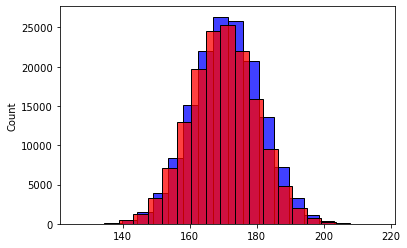

In [5]:
sns.histplot(men, color='b', bins=20)
sns.histplot(women, color='r', bins=20)

### Вывод
Несмотря на минимальную разницу между генерируемыми выборками в 1 см роста (около 0,5%), сам размер выборок достаточно большой, что делает эту разницу статистически значимой, приводя к очень маленькому значению $p_{value} = 4*10^{-176}$

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [6]:
Sigma = 150
confidence = 0.95
Delta = 50

Z = stats.norm.ppf( (1 + confidence) / 2 )

n = round( ( (Z * Sigma) / Delta ) ** 2 )
n

35

### Вывод
Задача аналогична Заданию №0

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [7]:
observations = pd.DataFrame([[10, 15], [39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])

observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [8]:
H0 = 'Ответы мага случайны'
H1 = 'Маг действительно умеет предсказывать погоду'

significance = 0.05

oddsratio, pvalue = stats.fisher_exact(observations)

if pvalue < significance:
    print(H1)
else:
    print(H0)
print('pvalue =', pvalue)

Ответы мага случайны
pvalue = 0.35417955365927367


In [9]:
print(stats.fisher_exact([[100, 150], [390, 340]]))

(0.5811965811965812, 0.0003194257226377766)


### Вывод
Еще раз убеждаемся, что размеры выборок влияют на значение p-value. Если бы мы получили в 10 раз больше ответов от мага, но соотношение между его ответами осталось бы тем же: `[[100, 150], [390, 340]]`. То значение p-value опустилось бы ниже уровня значимости и мы бы приняли альтернативную гипотезу о том, что ответы мага не случайны. Несмотря на то, что правильных ответов по прежнему лишь половина, что скорее может говорить о том, что маг дает предсказания наугад. Считаю само условие задачи неудачным примером для исследования этого статистического критерия.

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [10]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

confidence = 0.9

def mean_confidence_interval(data, confidence):
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)
    return m-h, m, m+h

mean_confidence_interval(data, confidence)

(6.074074746111319, 6.628571428571429, 7.183068111031539)

### Вывод
Интересно, что согласно построенному доверительному интервалу с уровнем доверия 90% лишь цифра 7 из выборки `data` попадет в этот интервал. Цифры 7 составляют лишь 20% от всей выборки. Вероятно можно значительно увеличить долю фактических попаданий, если взять выборку со случайным набором вещественных чисел, вместо целых.

<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [11]:
observations = pd.DataFrame([[1000, 15], [3900, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])

stats.fisher_exact(observations)

(0.5811965811965812, 0.10676601009446592)

In [12]:
H0 = 'Выборки принадлежат одному множеству'
H1 = 'Выборки не принадлежат одному множеству'

significance = 0.05

A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]

t, pvalue = stats.ttest_ind(A, B, equal_var=False)

if pvalue < significance:
    print(H1)
else:
    print(H0)
print('pvalue =', pvalue)

Выборки не принадлежат одному множеству
pvalue = 1.3216865332483862e-24


<AxesSubplot:ylabel='Count'>

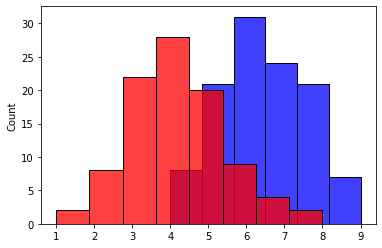

In [13]:
sns.histplot(A, bins=len(set(A)), color='b')
sns.histplot(B, bins=len(set(B)), color='r')

### Вывод
Особенно это заметно при визуальном анализе - выборки действительно не принадлежат одному множеству. Можно заключить, что иногда бывает достаточно визуализировать данные для того, чтобы проверить свои гипотезы.

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

In [14]:
H0 = 'Распределение нормальное'
H1 = 'Распределение не нормальное'

pvalue = 0.03
significance = 0.05

if pvalue < significance:
    print(H1)
else:
    print(H0)
print('pvalue =', pvalue)

Распределение не нормальное
pvalue = 0.03


### Вывод
В этой задаче вывод о форме распределения будет в любом случае зависеть от установленного уровня значимости. Я принял уровень значимости равным 5%, что привело к опровержению нулевой гипотезы.

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [15]:
H0 = 'Различия являются чисто случайными'
H1 = 'Имеется значимое различие эффективности препаратов А и B'

np.random.seed(11)

significance = 0.05

A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

t, pvalue = stats.ttest_ind(A, B, equal_var=False)

if pvalue < significance:
    print(H1)
else:
    print(H0)
print('pvalue =', pvalue)

Различия являются чисто случайными
pvalue = 0.051284961272800134


<AxesSubplot:ylabel='Count'>

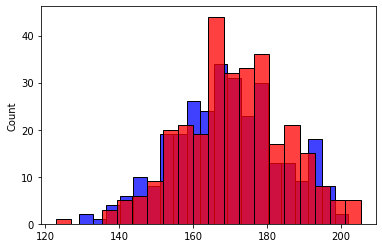

In [16]:
sns.histplot(A, bins=20, color='b')
sns.histplot(B, bins=20, color='r')

### Вывод
Различия были бы уже значимы при значении p-value равном или меньшем 0.05. Хотя можно отметить, что полученное значение достаточно близко к пороговому и в такой ситуации можно было бы заключить о необходимости проведения дополнительной серии испытаний.